In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier, RandomForestClassifier
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

**(b) Print out the names of the features (X) 
and the name of the target (y).**

In [42]:
# Print out the names of the features (X) and the name of the target (y)
feature = data.feature_names
target = data.target_names
print("Part B:")
print("Feature (X):")
print(feature)

print("\nTarget (y):")
print(target)

Part B:
Feature (X):
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target (y):
['malignant' 'benign']


**(c) Allocate the half of the data to Train (X train, y train) and the remaining half to Test (X test, y test)**

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print("Part C: "
      "\nThe data has split successfully")

Part C: 
The data has split successfully


**(g) Write a program that generates a decision tree from X train, y train and predict y pred from X test. You can compute accuracy of the classifier by comparing y pred and y test. Please print out the accuracy and the confusion matrix**

In [44]:
print("Part G: Decision Tree")
# Initialize the decision tree with max depth of 2
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
# Train the decision tree 
clf.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", round(accuracy, 3))

# Generate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Part G: Decision Tree

Accuracy: 0.951

Confusion Matrix:
[[ 91   7]
 [  7 180]]


**Part h: Plot Decision Tree**

Part H: Plot decision tree completed


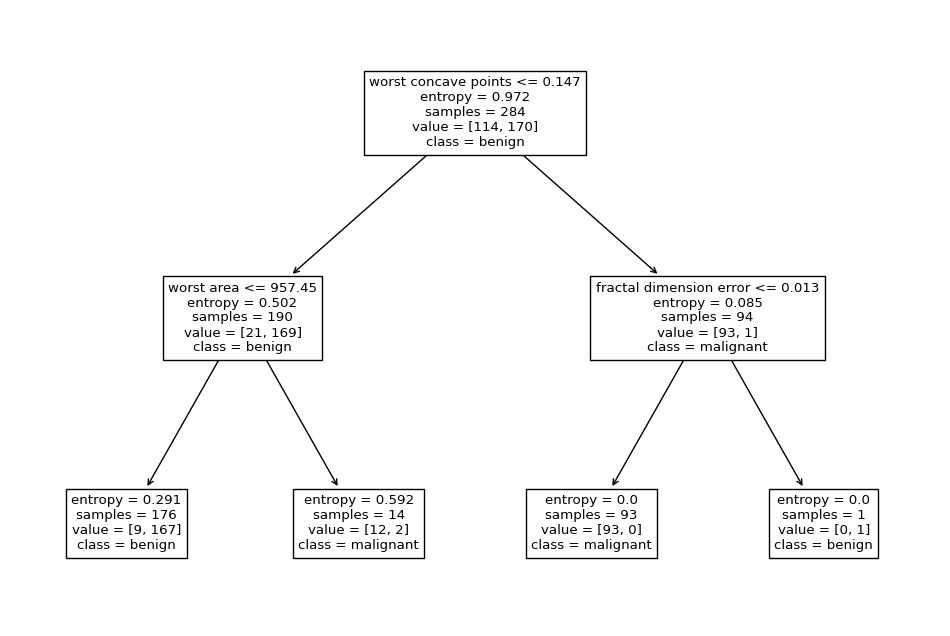

In [45]:
print("Part H: Plot decision tree completed")
# Generate decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature, class_names=target)
plt.show()

**Part i: Multiple decision trees using bagging and plot**

Part I: Multiple decision trees using bagging completed


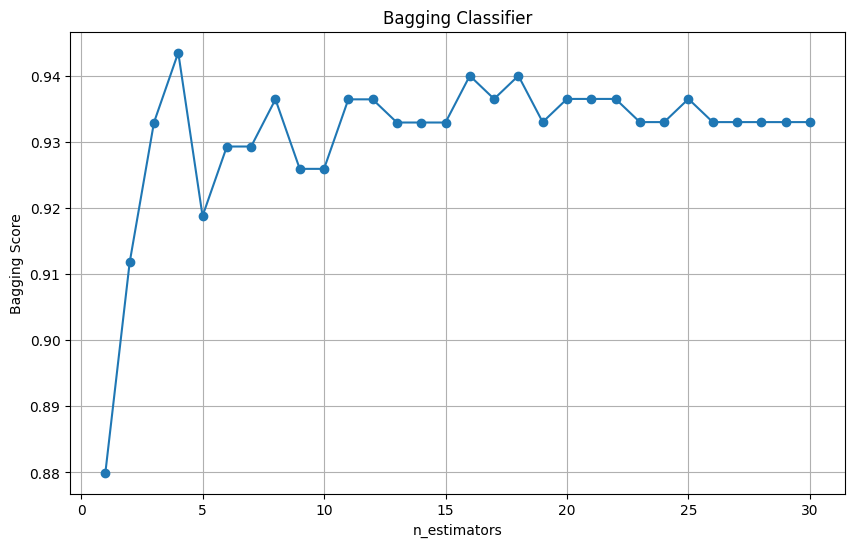

In [46]:
print('Part I: Multiple decision trees using bagging completed')
# Generate 30 data points of different X-axis values.
n_estimators_range = np.linspace(1, X.shape[1], 30, dtype=int)  
bagging_scores = []

for n_estimators in n_estimators_range:
    # Bagging with with generated tree and n_estimators
    bagging_clf = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
                                    , n_estimators=n_estimators, random_state=42)
    # Cross-validation with 3 folds
    scores = cross_val_score(bagging_clf, X_train, y_train, cv=5)  
    bagging_scores.append(scores.mean())  

# Plotting Bagging Scores vs. n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, bagging_scores, marker='o')
plt.title('Bagging Classifier')
plt.xlabel('n_estimators')
plt.ylabel('Bagging Score')
plt.grid(True)
plt.show()

**Part J: Multiple decision trees using AdaBoost**

Part J: Multiple decision trees using AdaBoost completed


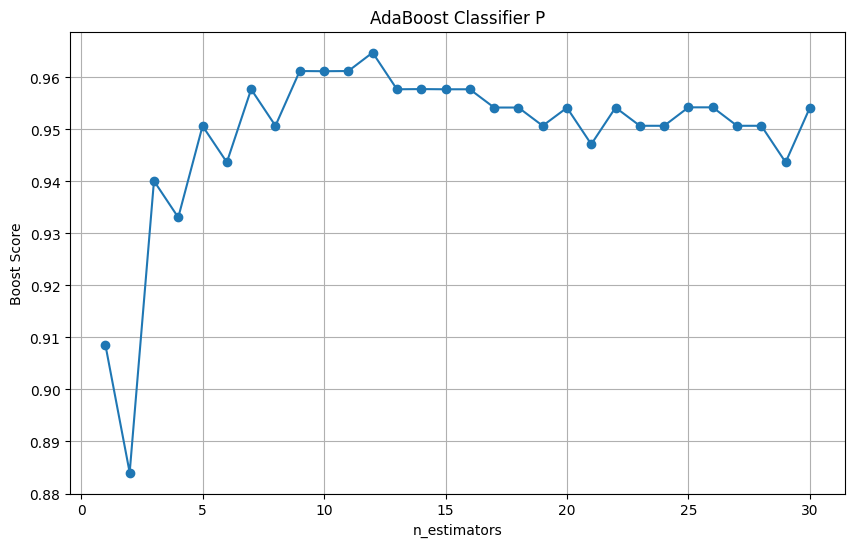

In [47]:
print("Part J: Multiple decision trees using AdaBoost completed")
boost_scores = []

# Iterate over different n_estimators values
for n_estimators in n_estimators_range:
    # AdaBoost with generated tree and n_estimators
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
                                 , n_estimators=n_estimators, random_state=42, algorithm='SAMME')

    # Cross-validation with 3 folds
    scores = cross_val_score(ada_clf, X_train, y_train, cv=3)
    boost_scores.append(scores.mean())

# Plotting Boost Scores vs. n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, boost_scores, marker='o')
plt.title('AdaBoost Classifier P')
plt.xlabel('n_estimators')
plt.ylabel('Boost Score')
plt.grid(True)
plt.show()

**Part K: Random Forest decision tree fixed n.**

Part K: Random Forest decision tree with n = 100 completed. 


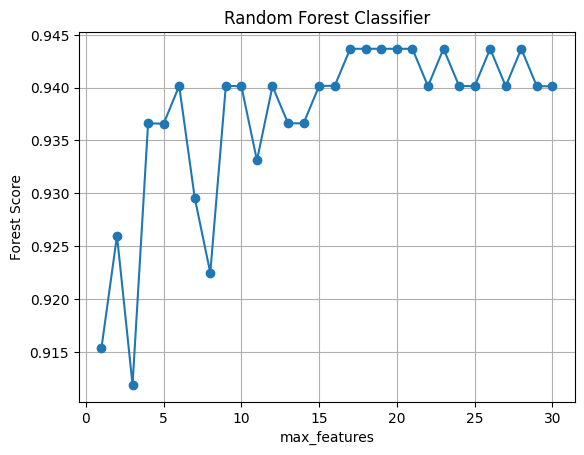

In [48]:
print("Part K: Random Forest decision tree with n = 100 completed. ")

# Generate 30 data points of different X-axis values.
max_features_range = np.linspace(1, X.shape[1], 30, dtype=int)  
forest_scores = []

# Iterate over different max_features values
for max_features in max_features_range:
    # Random Forest with 25 data points and fixed n
    rf_clf = RandomForestClassifier(criterion='entropy', max_depth=2,
                                    n_estimators=100, max_features=max_features, random_state=42)
    # Cross-validation 
    scores = cross_val_score(rf_clf, X_train, y_train, cv=3)
    forest_scores.append(scores.mean())

# Plotting Forest Scores vs. max_features
# plt.figure(figsize=(10, 6))
plt.plot(max_features_range, forest_scores, marker='o')
plt.title('Random Forest Classifier')
plt.xlabel('max_features')
plt.ylabel('Forest Score')
plt.grid(True)
plt.show()